In [141]:
import numpy as np
%pylab inline --no-import-all
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
## Neural nets
#.....................................
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import Conv2D, Flatten, MaxPooling2D, GaussianNoise
from keras.callbacks import History
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.metrics import TopKCategoricalAccuracy, SparseTopKCategoricalAccuracy

Populating the interactive namespace from numpy and matplotlib


In [139]:
pip install np_utils

     |████████████████████████████████| 61 kB 3.5 MB/s eta 0:00:011
  Created wheel for np-utils: filename=np_utils-0.5.12.1-py3-none-any.whl size=57125 sha256=62e48ebf1df10fffdb8df4a718386c9dd056d2ebdf6cff2b9fba4eca458819d7
  Stored in directory: /Users/manavmishra/Library/Caches/pip/wheels/8c/4e/ef/095c24693723c329f4cdc1079861cdbb2487d4b41b2496a4e7
Successfully built np-utils
Note: you may need to restart the kernel to use updated packages.


In [1005]:
with np.load('training-dataset.npz')  as data:
    img = data['x']
    lbl = data['y']

In [1011]:
# Dropping 1 position for prediction label
print(type(lbl))

<class 'numpy.ndarray'>


In [1012]:
for l in lbl:
    if l >1 or l<10:
        print(type(l))

<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'nu

KeyboardInterrupt: 

In [167]:
print(img.shape)

(124800, 784)


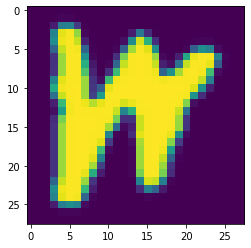

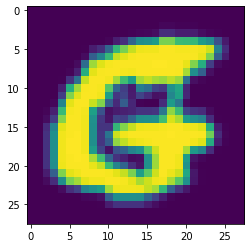

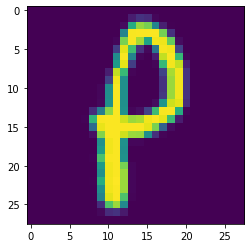

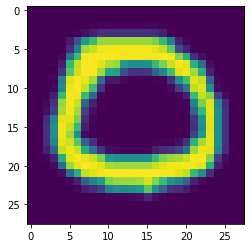

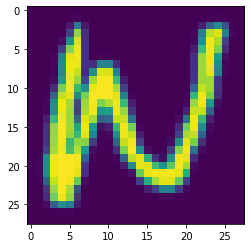

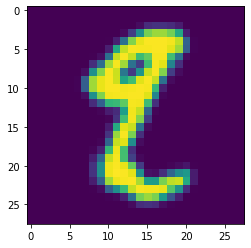

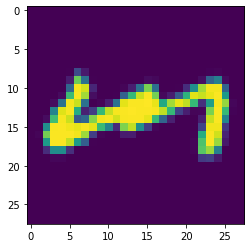

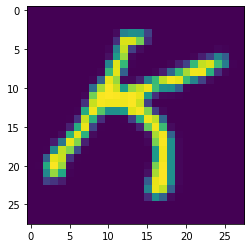

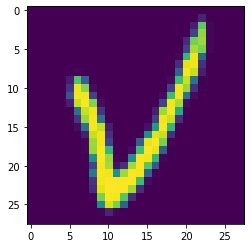

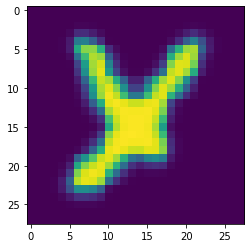

In [168]:
for im in range(10):
    image = img[im]
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels)
    plt.show()

In [982]:
# Splitting data into train and test with 80% for training data and 10% for test data

X_train, X_val_test, y_train, y_val_test = train_test_split(img, lbl, test_size=0.2,random_state=1) 

# Splitting the train data again into validation and train data with 80% of the train data for training and the 
# remaining 10% for validation purpose

X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.3, random_state=1) 


In [983]:
# Visualising the shape of the train and test data
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_test.shape)
print(y_val.shape)

(99840, 784)
(7488, 784)
(17472, 784)
(7488,)
(17472,)


In [171]:
print(X_train.shape)

(99840, 784)


In [984]:
# Preprocessing the data so that it runs faster during fitting the model
# Preprocess the data (these are NumPy arrays)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32") / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32") / 255
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1).astype("float32") / 255
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")
y_val = y_val.astype("float32")

In [985]:
# One hot decoding 
onehot = LabelBinarizer()
Y_train = onehot.fit_transform(y_train)
Y_val   = onehot.fit_transform(y_val)
Y_test   = onehot.transform(y_test)

In [174]:
print(X_train.shape[0:])

(99840, 28, 28, 1)


In [179]:
es = EarlyStopping(monitor= 'val_loss')
optimizer = Adam(lr=0.0001)
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(350, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(Y_train.shape[1], activation='softmax')) # We need to have as many units as classes, and softmax activation

# For classification, the loss function should be categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics = ['accuracy'])
history = model.fit(X_train, Y_train, batch_size = 450, epochs=100, validation_data = (X_val, Y_val), verbose=1, callbacks = [es])

Train on 99840 samples, validate on 17472 samples
Epoch 1/100
99840/99840 [==============================] - 41s 409us/step - loss: 2.1102 - accuracy: 0.4931 - val_loss: 1.1892 - val_accuracy: 0.6670
Epoch 2/100
99840/99840 [==============================] - 37s 369us/step - loss: 0.9847 - accuracy: 0.7237 - val_loss: 0.8472 - val_accuracy: 0.7653
Epoch 3/100
99840/99840 [==============================] - 35s 353us/step - loss: 0.7387 - accuracy: 0.7944 - val_loss: 0.6720 - val_accuracy: 0.8142
Epoch 4/100
99840/99840 [==============================] - 39s 391us/step - loss: 0.6004 - accuracy: 0.8321 - val_loss: 0.5709 - val_accuracy: 0.8439
Epoch 5/100
99840/99840 [==============================] - 38s 382us/step - loss: 0.5198 - accuracy: 0.8558 - val_loss: 0.5130 - val_accuracy: 0.8591
Epoch 6/100
99840/99840 [==============================] - 36s 364us/step - loss: 0.4685 - accuracy: 0.8703 - val_loss: 0.4772 - val_accuracy: 0.8677
Epoch 7/100
99840/99840 [=========================

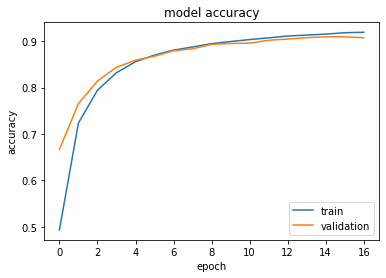

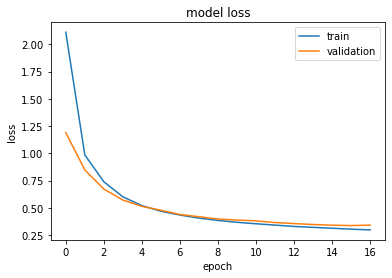

In [180]:
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [181]:
# Save the model to disk.
#model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')

# Predicting the classes on test set and printing the accuracy
y_pred = model.predict_classes(X_test, verbose=1)
print(accuracy_score(y_test, y_pred))

7488/7488 [==============================] - 3s 375us/step
0.9045138888888888


In [182]:
# Evaluating the model
model.evaluate(X_test,Y_test)

7488/7488 [==============================] - 2s 332us/step


[0.3321675826023277, 0.9045138955116272]

In [832]:
(X_test.shape)

(7488, 28, 28, 1)

In [183]:
# Model summary
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_113 (Dense)            (None, 350)               280350    
_________________________________________________________________
dense_114 (Dense)            (None, 26)              

In [184]:
print((y_pred[:10]))

[15 15  5 12 11  5  7 20 17  0]


In [185]:
print((y_test[:10]).astype('int32'))

[15 15  5 12 11  5  7 20 17  0]


In [186]:
# Task 2 
# Making the model Robust against noises in the image

In [187]:
# compiling and fitting the sequential model
#.....................................
es = EarlyStopping(monitor= 'val_loss')
optimizer = Adam(lr=0.0001)
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same',strides=(1, 1),activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(GaussianNoise(0.5))
model.add(Flatten())
model.add(Dense(360, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(360, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(360, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(360, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(Y_train.shape[1], activation='softmax')) # We need to have as many units as classes, and softmax activation

# For classification, the loss function should be categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics = ['top_k_categorical_accuracy'])
history1 = model.fit(X_train, Y_train, epochs=100, batch_size = 450, validation_data = (X_val, Y_val), verbose=1, callbacks = [es])

Train on 99840 samples, validate on 17472 samples
Epoch 1/100
99840/99840 [==============================] - 75s 751us/step - loss: 2.8575 - accuracy: 0.2119 - val_loss: 1.3767 - val_accuracy: 0.6315
Epoch 2/100
99840/99840 [==============================] - 80s 798us/step - loss: 1.1149 - accuracy: 0.7023 - val_loss: 0.8323 - val_accuracy: 0.7907
Epoch 3/100
99840/99840 [==============================] - 92s 925us/step - loss: 0.7609 - accuracy: 0.8101 - val_loss: 0.6515 - val_accuracy: 0.8454
Epoch 4/100
99840/99840 [==============================] - 86s 859us/step - loss: 0.6288 - accuracy: 0.8487 - val_loss: 0.5720 - val_accuracy: 0.8669
Epoch 5/100
99840/99840 [==============================] - 90s 899us/step - loss: 0.5548 - accuracy: 0.8703 - val_loss: 0.5301 - val_accuracy: 0.8783
Epoch 6/100
99840/99840 [==============================] - 88s 882us/step - loss: 0.5098 - accuracy: 0.8839 - val_loss: 0.4791 - val_accuracy: 0.8952
Epoch 7/100
99840/99840 [=========================

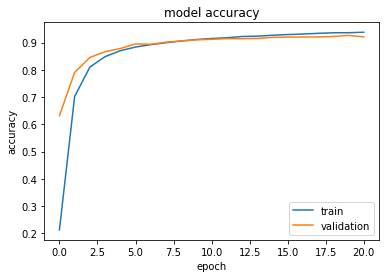

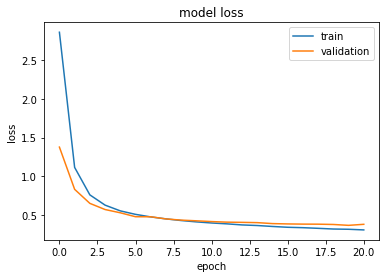

In [188]:
#summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [884]:
y_pred1 = model.predict_classes(X_test, verbose=1)
print(accuracy_score(y_test, y_pred1))
print(y_test.shape)

7488/7488 [==============================] - 2s 300us/step
0.9145299145299145
(7488,)


In [571]:
top_values_index = sorted(range(len(y_pred1)), key=lambda i: y_pred1[i])[-5:]
print(top_values_index)

[7330, 7360, 7368, 7405, 7443]


In [191]:
img_data = np.load('test-dataset.npy')

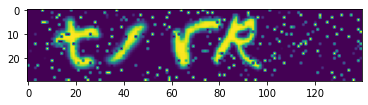

In [192]:
imt=img_data[1]
plt.imshow(imt)
plt.show()

In [193]:
from skimage.feature import hog
import numpy as np

image_height = 48
image_width = 48
window_size = 24
window_step = 6

def sliding_hog_windows(imge):
    hog_vector = []
    for y in xrange(0, image_height, window_step):
        for x in xrange(0, image_width, window_step):
            window = imge[y:y+window_size, x:x+window_size]
            hog_vector.extend(hog(window, orientations=8, pixels_per_cell=(8, 8),
                                            cells_per_block=(1, 1), visualise=False))
    return hog_vector
    
imge = img_data[0]
hog_vector = sliding_hog_windows(imge)

NameError: name 'xrange' is not defined

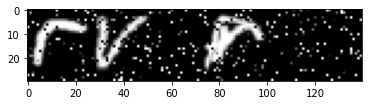

In [194]:
import numpy as np
from PIL import Image
import cv2
img1 = cv2.imread('img_data[0]',1)
img = Image.fromarray(img_data[2345])
plt.imshow(img)
plt.show()

Rectangle(xy=(36, 3), width=19, height=22, angle=0)
Rectangle(xy=(70, 4), width=37, height=20, angle=0)
Rectangle(xy=(57, 9), width=1, height=1, angle=0)
Rectangle(xy=(6, 11), width=9, height=6, angle=0)
Rectangle(xy=(16, 12), width=13, height=6, angle=0)


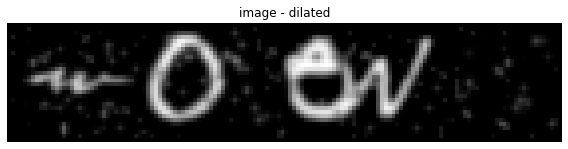

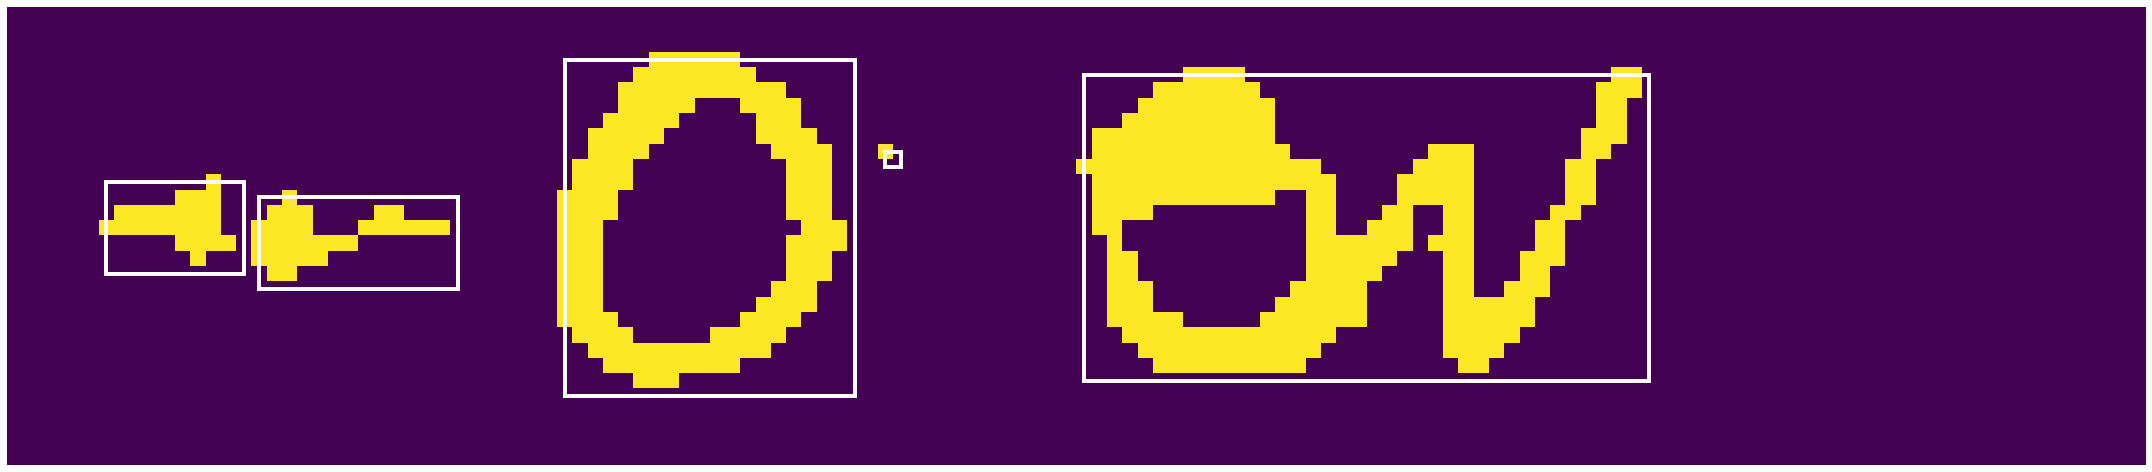

<Figure size 432x288 with 0 Axes>

In [1003]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu, rank, roberts, sobel, sobel_h, scharr, scharr_v, scharr_h,threshold_isodata
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square, disk
from skimage.color import label2rgb
from skimage.feature import canny
from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction
from scipy import ndimage as ndi
from skimage import feature, io
from skimage.segmentation import active_contour
from skimage import measure
from skimage.color import rgb2gray
from skimage.filters.rank import mean,  mean_bilateral

coord_list=[]
# Convert to float: Important for subtraction later which won't work with uint8
#for im in img_data:
image_ski = img_data[6543]#1 2433 2343 5435 7345 3456 7734 1997 1998 1977 1941 3462 2345 3rd box prob :- 6543 6534
image1 = gaussian_filter(image_ski, 0.88)
#image1 = sobel_v(image1)
seed = np.copy(image1)
seed[1:-1, 1:-1] = image1.min()
mask = image1

dilated = reconstruction(seed, mask, method='dilation')
fig, ( ax2) = plt.subplots(nrows=1,
                                ncols=1,
                                figsize=(8, 2.5),
                                sharex=True,
                                sharey=True)
ax2.imshow(image1 - dilated, cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()

# apply threshold
thresh = threshold_otsu(image1)
im_dil = image1 - dilated
bw = closing(im_dil > thresh, square(1))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
#image_label_overlay = label2rgb(label_image, image=image, bg_label=0)

fig, ax = plt.subplots(figsize=(30, 10))
ax.imshow(bw)
for region in regionprops(label_image):
        # take regions with large enough areas
       # if region.area >= 30 or region.area >= 500 :
            # draw rectangle around segmented coins
    minr, minc, maxr, maxc = region.bbox
    x,y,w,h=minc,minr,(maxc-minc),(maxr-minr)
    if w >9 or h>=10:
        coord_list.append(x)
        coord_list.append(w)
        coord_list.append(y)
        coord_list.append(h)
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                         fill=False, edgecolor='white', linewidth=4) 
    print(rect)
    ax.add_patch(rect)    
ax.set_axis_off()
plt.tight_layout()
plt.show()
#-------------------------------------------------------------
from skimage.util import img_as_ubyte
from skimage import data
from skimage.exposure import histogram


plt.tight_layout()
from skimage.filters.rank import median
from skimage.morphology import disk, ball




In [1004]:
import itertools
def split_image(coord_list):
    new_coord=[]
    updated_coord=[]
    final_coord=[]
    for i in range(len(coord_dict)):
            args = [iter(coord_dict)] * 4
            new_coord = list(itertools.zip_longest(*args, fillvalue=None))
    print(new_coord)
    if len(new_coord)<4:
        if len(new_coord)==2:
            #for j in range(len(new_coord)):
            if new_coord[0][1] >=28 and new_coord[0][1] <=50:
                    c1=new_coord[0][1]//2
                    c2=new_coord[1][1]//2
                    updated_coord=[new_coord[0][0]+c2,new_coord[0][1]//2+c1,new_coord[0][2],new_coord[0][3]]+[new_coord[0][0]-4,new_coord[0][1]//2+c1-2*c2,new_coord[0][2],new_coord[0][3]]+[new_coord[1][0],new_coord[1][1],new_coord[1][2],new_coord[1][3]]+[new_coord[1][0]-4,new_coord[1][1]//2+c1-2*c2,new_coord[1][2],new_coord[1][3]] 
            #print(updated_coord)
            for k in range(len(updated_coord)):
                    args = [iter(updated_coord)] * 4
                    final_coord = list(itertools.zip_longest(*args, fillvalue=None))
            return(sorted(final_coord))
        else:
            for j in range(len(new_coord)):
                if new_coord[j][1] >=28:
                    c1=new_coord[j][1]//2
                    updated_coord=[new_coord[j][0],new_coord[j][1]//2-10,new_coord[j][2]+2,new_coord[j][3]]+[new_coord[j][0]+c1+c1//2,new_coord[j][1]//2+3,new_coord[j][2]+3,new_coord[j][3]+c1//2]+[new_coord[j+1][0],new_coord[j+1][1],new_coord[j+1][2],new_coord[j+1][3]]+[new_coord[j+2][0],new_coord[j+2][1],new_coord[j+2][2],new_coord[j+2][3]]
            for k in range(len(new_coord)):
                    args = [iter(updated_coord)] * 4
                    final_coord = list(itertools.zip_longest(*args, fillvalue=None))
            return(sorted(final_coord))
    else:
        return(sorted(new_coord))
split_image(coord_list)

[(5, 22, 2, 24), (81, 15, 3, 22), (59, 12, 4, 21), (32, 24, 6, 16)]


[(5, 22, 2, 24), (32, 24, 6, 16), (59, 12, 4, 21), (81, 15, 3, 22)]

[(5, 22, 2, 24), (81, 15, 3, 22), (59, 12, 4, 21), (32, 24, 6, 16)]


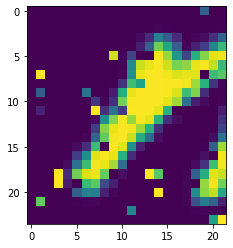

(28, 28)


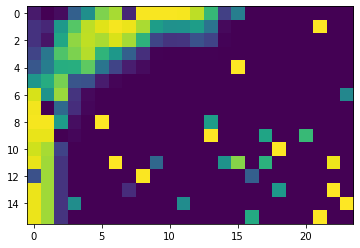

(28, 28)


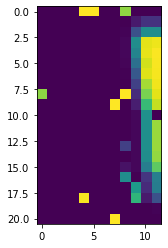

(28, 28)


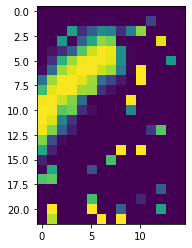

(28, 28)


In [1002]:
import numpy as asarray
#for i in imag_data:
imk=image_ski
coords= split_image(coord_dict)
image_pred=[]
pred_store=[]
for i in range(len(coords)):
    #img[x:x+w, y:y+h]
    imtest1=imk[coords[i][2]:coords[i][2]+coords[i][3],coords[i][0]:coords[i][0]+coords[i][1]]
    plt.imshow(imtest1)
    plt.show()
    res1 = cv2.resize(imtest1, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
    res1.shape
    print(res1.shape)
    #pred_img1 = np.expand_dims(res1, axis=0)
    image_pred.append(np.asarray(res1))
image_pred=np.array(image_pred)
import cv2

In [994]:
image_pred = image_pred.reshape(image_pred.shape[0], 28, 28, 1).astype("float32") / 255
print("shape",(image_pred.shape) )
preds1=model.predict_classes(image_pred, verbose=1)
print(preds1[:5])

shape (4, 28, 28, 1)
4/4 [==============================] - 0s 20ms/step
[ 5  7  9 25]


In [937]:
print(accuracy_score(y_test, image_pred))

ValueError: Found input variables with inconsistent numbers of samples: [7488, 4]

In [ ]:
from skimage.filters import sobel
from skimage.measure import label
from skimage.segmentation import slic, join_segmentations, watershed
from skimage.color import label2rgb
from skimage import data

coins = (img_data[343])

# Make segmentation using edge-detection and watershed.
edges = sobel(coins)

# Identify some background and foreground pixels from the intensity values.
# These pixels are used as seeds for watershed.
markers = np.zeros_like(coins)
foreground, background = 1, 2
markers[coins < 30.0] = background
markers[coins > 150.0] = foreground

ws = watershed(edges, markers)
seg1 = label(ws == foreground)

# Make segmentation using SLIC superpixels.
seg2 = slic(coins, n_segments=6, max_iter=900, sigma=1, compactness=700,
            multichannel=False, start_label=0)

# Combine the two.
segj = join_segmentations(seg1, seg2)

# Show the segmentations.
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(9, 5),
                         sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(coins, cmap='gray')
ax[0].set_title('Image')

color1 = label2rgb(seg1, image=coins, bg_label=0)
ax[1].imshow(color1)
ax[1].set_title('Sobel+Watershed')

color2 = label2rgb(seg2, image=coins, image_alpha=1, bg_label=-1)
ax[2].imshow(color2)
ax[2].set_title('SLIC superpixels')
# Combine the two.
segj = join_segmentations(seg1, seg2)

color3 = label2rgb(segj, image=coins, image_alpha=1, bg_label=-1)
ax[3].imshow(color3)
ax[3].set_title('Join')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

In [ ]:
type(seg2)

In [ ]:
nparr = np.fromstring(img_data[0], np.uint8)

#img_np = cv2.imdecode(nparr, cv2.CV_LOAD_IMAGE_COLOR)
img = np.float32(img1)
gray = cv2.cvtColor('img', cv2.COLOR_BGR2GRAY)

# Convert to binary and invert polarity
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find connected components (clusters)
nlabel, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity=8)


# Remove small clusters: With both width<=10 and height<=10 (clean small size noise).
for i in range(nlabel):
    if (stats[i, cv2.CC_STAT_WIDTH] <= 10) and (stats[i, cv2.CC_STAT_HEIGHT] <= 10):
        thresh[labels == i] = 0

#Use closing with very large horizontal kernel
mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.ones((1, 150)))

# Find connected components (clusters) on mask
nlabel, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)

# Find label with maximum area
# https://stackoverflow.com/questions/47520487/how-to-use-python-opencv-to-find-largest-connected-component-in-a-single-channel
largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])

# Set to zero all clusters that are not the largest cluster.
thresh[labels != largest_label] = 0

# Use closing with horizontal kernel of 15 (connecting components of digits)
mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.ones((1, 15)))

# Find connected components (clusters) on mask again
nlabel, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)

# Remove small clusters: With both width<=30 and height<=30
for i in range(nlabel):
    if (stats[i, cv2.CC_STAT_WIDTH] <= 30) and (stats[i, cv2.CC_STAT_HEIGHT] <= 30):
        thresh[labels == i] = 0

# Use closing with horizontal kernel of 15, this time on thresh
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.ones((1, 15)))

# Use median filter with 3x5 mask (using OpenCV medianBlur with k=5 is removes important details).
thresh = scipy.signal.medfilt(thresh, (3,5))

# Inverse polarity
thresh = 255 - thresh

# Apply OCR
data = pytesseract.image_to_string(thresh, config="-c tessedit"
                                                  "_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890-/"
                                                  " --psm 6"
                                                  " ")

print(data)

# Show image for testing
cv2.imshow('thresh', thresh)


In [ ]:
'''''#from scipy import misc

# Read the image
img = img_data[0]
height, width = img.shape

# Cut the image in half
#width_cutoff = width // 3
s1 = img[3:14, 12:20]
s2 = img[4:34, 42:63]
s3 = img[6:23, 80:101]
s4 = img[13:25, 7:26]
#Save each half
#misc.imsave("face1.png", s1)
#misc.imsave("face2.png", s2)
'''''
#for im in (s1,s2,s3,s4):
img = img_data[0]
image1 = img[13:31, 7:25]
image1 = np.array(image1, dtype='float')
pixels1 = image1
plt.imshow(img1)
plt.show()

NameError: name 'imtest1' is not defined

NameError: name 'imtest1' is not defined

NameError: name 'res' is not defined

In [ ]:
pred_img.shape

In [ ]:
for image_pr in img_data:
    plt.imshow(image_pr)
    plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
from PIL import Image
import pathlib

In [ ]:
from skimage.feature import hog
import numpy as np

image_height = 48
image_width = 48
window_size = 24
window_step = 6

def sliding_hog_windows(image):
    hog_vector = []
    for y in range(0, image_height, window_step):
        for x in range(0, image_width, window_step):
            window = image[y:y+window_size, x:x+window_size]
            hog_vector.extend(hog(window, orientations=8, pixels_per_cell=(8, 8),cells_per_block=(1, 1)))
    return hog_vector
    
image = imk
hog_vector = sliding_hog_windows(image)

In [ ]:
letter.shape